In [23]:
import pandas as pd
import shap
import sklearn

shap.initjs()
# a classic housing price dataset
X,y = shap.datasets.boston()
X100 = shap.utils.sample(X, 100) # 100 instances for use as the background distribution

# simple linear model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
    :func:`~sklearn.datasets.fetch_california_housing`) and the Ames housing
    datas

LinearRegression()

In [2]:
# Examine model coefficients
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(4))

Model coefficients:

CRIM = -0.108
ZN = 0.0464
INDUS = 0.0206
CHAS = 2.6867
NOX = -17.7666
RM = 3.8099
AGE = 0.0007
DIS = -1.4756
RAD = 0.306
TAX = -0.0123
PTRATIO = -0.9527
B = 0.0093
LSTAT = -0.5248


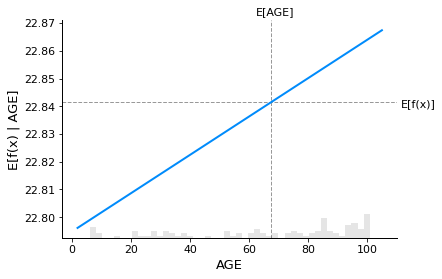

In [3]:
# Partial Dependence Plots
shap.plots.partial_dependence(
    "AGE", model.predict, X100, ice=False, model_expected_value=True, feature_expected_value=True
)

Permutation explainer: 507it [00:11,  7.10it/s]                         


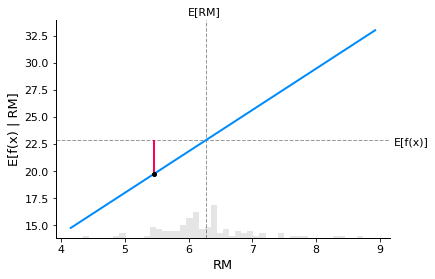

In [4]:
# compute the SHAP values for the linear model
explainer = shap.Explainer(model.predict, X100)
shap_values = explainer(X)

# make a standard partial dependence plot
sample_ind = 18
shap.partial_dependence_plot(
    "RM",
    model.predict,
    X100,
    model_expected_value=True,
    feature_expected_value=True,
    ice=False,
    shap_values=shap_values[sample_ind:sample_ind+1,:]

)

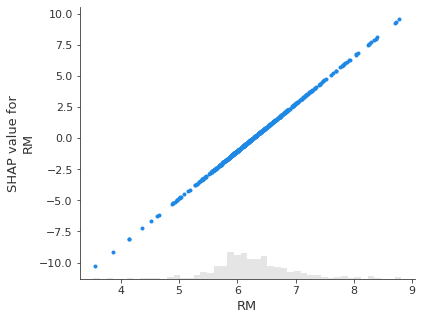

In [5]:
shap.plots.scatter(shap_values[:, "RM"])

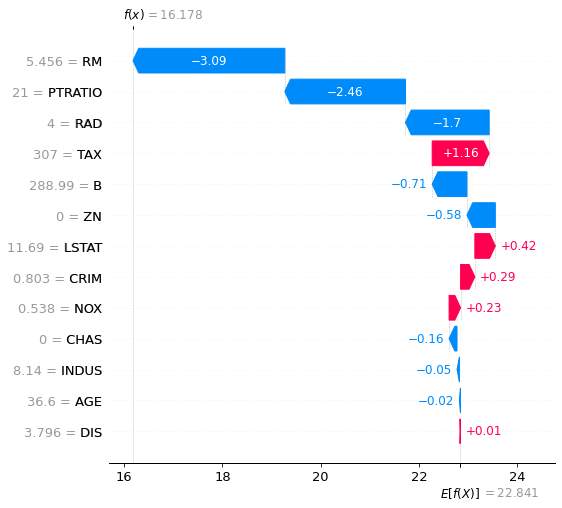

In [6]:
shap.plots.waterfall(shap_values[sample_ind], max_display=14)

/Users/plombardo/Library/Caches/pypoetry/virtualenvs/shap-visualization-niTr20nb-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/plombardo/Library/Caches/pypoetry/virtualenvs/shap-visualization-niTr20nb-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/plombardo/Library/Caches/pypoetry/virtualenvs/shap-visualization-niTr20nb-py3.8/lib/python3.8/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/plombardo/Library/Caches/pypoetry/virtuale

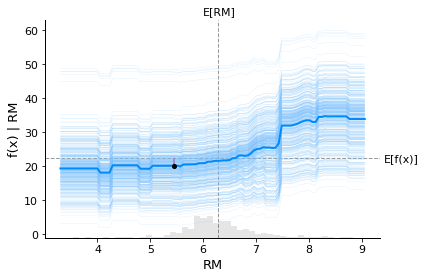

In [20]:
# Explaining an additive regression model
# Fit a Generalized Additive Model (GAM) to the data
# "In statistics, a GAM is a generalize linear model in which the liner response variable depends linearly
# on unknown smooth functions of some predictor variables."
import interpret.glassbox
model_ebm = interpret.glassbox.ExplainableBoostingRegressor()
model_ebm.fit(X, y)

# Explain the GAM model with SHAP
explainer_ebm = shap.Explainer(model_ebm.predict, X100)
shap_values_ebm = explainer_ebm(X)

# Make a standard partial dependence plot with a single SHAP value overlaid
fix, ax = shap.partial_dependence_plot(
    "RM",
    model_ebm.predict,
    X,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=True,
    shap_values=shap_values_ebm[sample_ind:sample_ind+1,:]
)

In [19]:
X.iloc[[0]]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


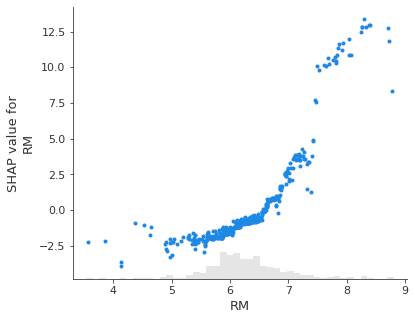

In [21]:
shap.plots.scatter(shap_values_ebm[:, "RM"])

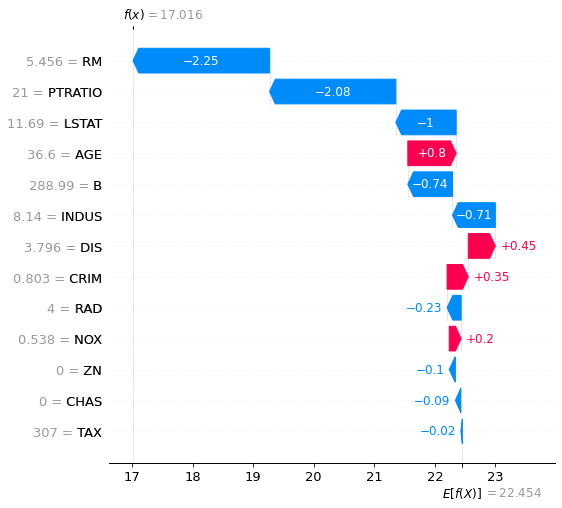

In [24]:
# The waterfall plot shows how we get from explainer.expected_value to model.predict(X)[sample_ind]
shap.plots.waterfall(shap_values_ebm[sample_ind], max_display=14)

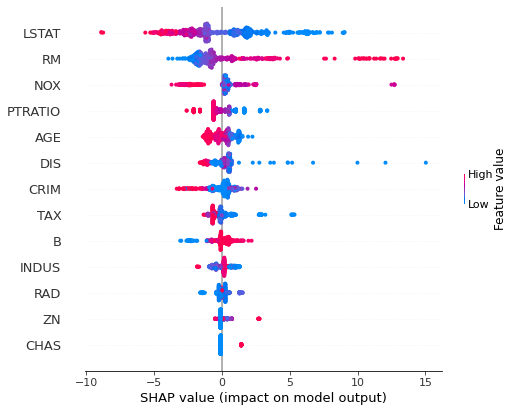

In [25]:
shap.plots.beeswarm(shap_values_ebm, max_display=14)

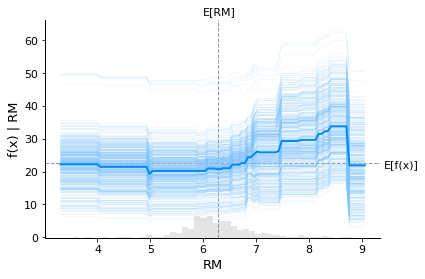

In [54]:
# Explaining a non-additive boosted tree model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot with a single shap value overlaid
fix,ax = shap.partial_dependence_plot(
    "RM",
    model_xgb.predict,
    X,
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=True,
)

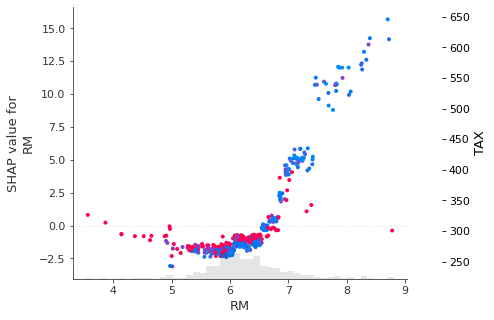

In [33]:
# Explaining a non-additive boosted tree model
import xgboost
model_xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=2).fit(X, y)

# explain the GAM model with SHAP
explainer_xgb = shap.Explainer(model_xgb, X100)
shap_values_xgb = explainer_xgb(X)

# make a standard partial dependence plot for a single prediction (X.iloc[[0]])
fix,ax = shap.partial_dependence_plot(
    "RM",
    model_xgb.predict,
    X.iloc[[0]],
    model_expected_value=True,
    feature_expected_value=True,
    show=False,
    ice=True,
)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
100,0.14866,0.0,8.56,0.0,0.52,6.727,79.9,2.7778,5.0,384.0,20.9,394.76,9.42
